In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

# The simplest nerual network

Predicting the relationship between  
0 0 1 -> 0  
0 1 1 -> 0   
1 0 1 -> 1  
1 1 1 -> 1  


In [2]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# output dataset            
y = np.array([[0,0,1,1]]).T

The input data contain 3 number, each being either a one or zero.  
The output data is one or zero corresponding to the input data in a "certain" relationship

In [3]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [4]:
y

array([[0],
       [0],
       [1],
       [1]])

0 0 1 -> 0  
0 1 1 -> 0   
1 0 1 -> 1  
1 1 1 -> 1  


Notice that the first column correspond directly with the output.


In [5]:
np.random.seed(10)

# random weights are being initialize  
syn0 = 2*np.random.random((3,1)) - 1

#iteration
for iter in range(10000):

    # forward propagation
    
    # first layer, layer 0 . The input layer
    l0 = X
    # the hidden layer. With the activation function sigmoid.
    l1 = nonlin(np.dot(l0,syn0))
    
    if (iter <= 1000 and iter % 100 ==0):
        print(iter)
        print(l1)
    # backward propagration
    l1_error = y - l1

    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)
print("result")
print (l1)

0
[[ 0.56642907]
 [ 0.33376626]
 [ 0.69209624]
 [ 0.46292857]]
100
[[ 0.11696839]
 [ 0.08695213]
 [ 0.93139185]
 [ 0.90706346]]
200
[[ 0.07778048]
 [ 0.05996051]
 [ 0.95205137]
 [ 0.93756417]]
300
[[ 0.06174827]
 [ 0.04828883]
 [ 0.96118912]
 [ 0.95023332]]
400
[[ 0.05258563]
 [ 0.04144841]
 [ 0.96659507]
 [ 0.95752337]]
500
[[ 0.04649997]
 [ 0.03683727]
 [ 0.97025888]
 [ 0.96238485]]
600
[[ 0.04209358]
 [ 0.03346519]
 [ 0.97294769]
 [ 0.96591444]]
700
[[ 0.03871866]
 [ 0.03086385]
 [ 0.97502723]
 [ 0.96862316]]
800
[[ 0.03602951]
 [ 0.02877972]
 [ 0.97669653]
 [ 0.97078475]]
900
[[ 0.033823  ]
 [ 0.02706221]
 [ 0.97807429]
 [ 0.97256053]]
1000
[[ 0.03197105]
 [ 0.0256156 ]
 [ 0.97923618]
 [ 0.97405244]]
result
[[ 0.00967084]
 [ 0.00786064]
 [ 0.9935941 ]
 [ 0.99211624]]


shown here that over the first thousand iteration,  
the first two weights are approching 0.
While the last two weights are approching 1.
Which matches with our expected output: 0 0 1 1


# next problem : Predicting the standard deviation using data from a pervious time frame

# data set
HSI  - 200 datapoint

24578.42969	4/26/2017  
24698.48047	4/27/2017  
24615.13086	4/28/2017  
24696.13086	5/2/2017  
...          ...

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

Using TensorFlow backend.


In [7]:
np.random.seed(7)
look_back = 29
# load the dataset

In [8]:
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[0], engine='python')
datasets = dataframe.values
dataset = datasets.astype('float32')

Splitting the data into training test and testing test using a 80% split.  
The data range for the testing test is actually from the 80% cuttof - 29 to the very last data.  
Since the 29 data prior to the cutoff will produce the first prediction directly on the cut.

In [9]:
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]#, dataset[train_size-look_back-1:len(dataset),:]

159 training datapoint, 70 testing data point =  229 = 200+29 as expected

In [10]:
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                # newstd = np.std(np.append(a,dataset[i+look_back+1]))
                a = a -mean
                dataX.append(a)
                dataY.append(dataset[i+look_back+1])
        return np.array(dataX), np.array(dataY)

The function that convert our dataset into a moving window time frame

In [11]:
trainX, trainY = create_dataset(train, look_back)

In [12]:
trainX[:3] , trainY[:3]

(array([[-938.70117188, -865.26171875, -603.76171875, -446.00195312,
         -621.95117188, -170.66015625, -251.73046875,  -97.77148438,
         -315.890625  ,  109.6484375 ,  303.51953125,  292.37890625,
          394.55859375,  140.77929688, -129.16015625, -226.84179688,
         -142.45117188,   52.65820312,  -99.02148438,  317.16992188,
          611.23828125,  585.45898438,  684.83984375,  676.34960938,
          303.79882812,  272.06835938,  295.578125  ,  -99.18164062,
          -31.66015625],
        [-897.52929688, -636.02929688, -478.26953125, -654.21875   ,
         -202.92773438, -283.99804688, -130.0390625 , -348.15820312,
           77.38085938,  271.25195312,  260.11132812,  362.29101562,
          108.51171875, -161.42773438, -259.109375  , -174.71875   ,
           20.390625  , -131.2890625 ,  284.90234375,  578.97070312,
          553.19140625,  652.57226562,  644.08203125,  271.53125   ,
          239.80078125,  263.31054688, -131.44921875,  -63.92773438,
         

the dataset X contain 29 data, repersenting the t-29 to t-1 datapoint. the dataset Y contain the actual value of T

# Building the network

In [13]:
model = Sequential()
model.add(Dense(20,input_dim=look_back, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='linear'))


The network is in the form of [20]->[10]->[1]

In [14]:
epoch=1000
model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epoch, batch_size=1, verbose=2)
##
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))


Epoch 1/1000
0s - loss: 95.7456
Epoch 2/1000
0s - loss: 65.1390
Epoch 3/1000
0s - loss: 44.9387
Epoch 4/1000
0s - loss: 38.4382
Epoch 5/1000
0s - loss: 30.0995
Epoch 6/1000
0s - loss: 26.0376
Epoch 7/1000
0s - loss: 22.2795
Epoch 8/1000
0s - loss: 19.4439
Epoch 9/1000
0s - loss: 18.0687
Epoch 10/1000
0s - loss: 17.7898
Epoch 11/1000
0s - loss: 17.0819
Epoch 12/1000
0s - loss: 16.9627
Epoch 13/1000
0s - loss: 16.4330
Epoch 14/1000
0s - loss: 16.3337
Epoch 15/1000
0s - loss: 16.1361
Epoch 16/1000
0s - loss: 15.8225
Epoch 17/1000
0s - loss: 15.4730
Epoch 18/1000
0s - loss: 15.2989
Epoch 19/1000
0s - loss: 15.2740
Epoch 20/1000
0s - loss: 15.0083
Epoch 21/1000
0s - loss: 14.6119
Epoch 22/1000
0s - loss: 14.5511
Epoch 23/1000
0s - loss: 14.3187
Epoch 24/1000
0s - loss: 14.0660
Epoch 25/1000
0s - loss: 13.7655
Epoch 26/1000
0s - loss: 13.6093
Epoch 27/1000
0s - loss: 13.2678
Epoch 28/1000
0s - loss: 13.0740
Epoch 29/1000
0s - loss: 12.9221
Epoch 30/1000
0s - loss: 12.8060
Epoch 31/1000
0s - 

In [15]:
trainPredict = model.predict(trainX)
trainPredict[:3]

array([[ 19927.08203125],
       [ 19786.23046875],
       [ 20078.34375   ]], dtype=float32)

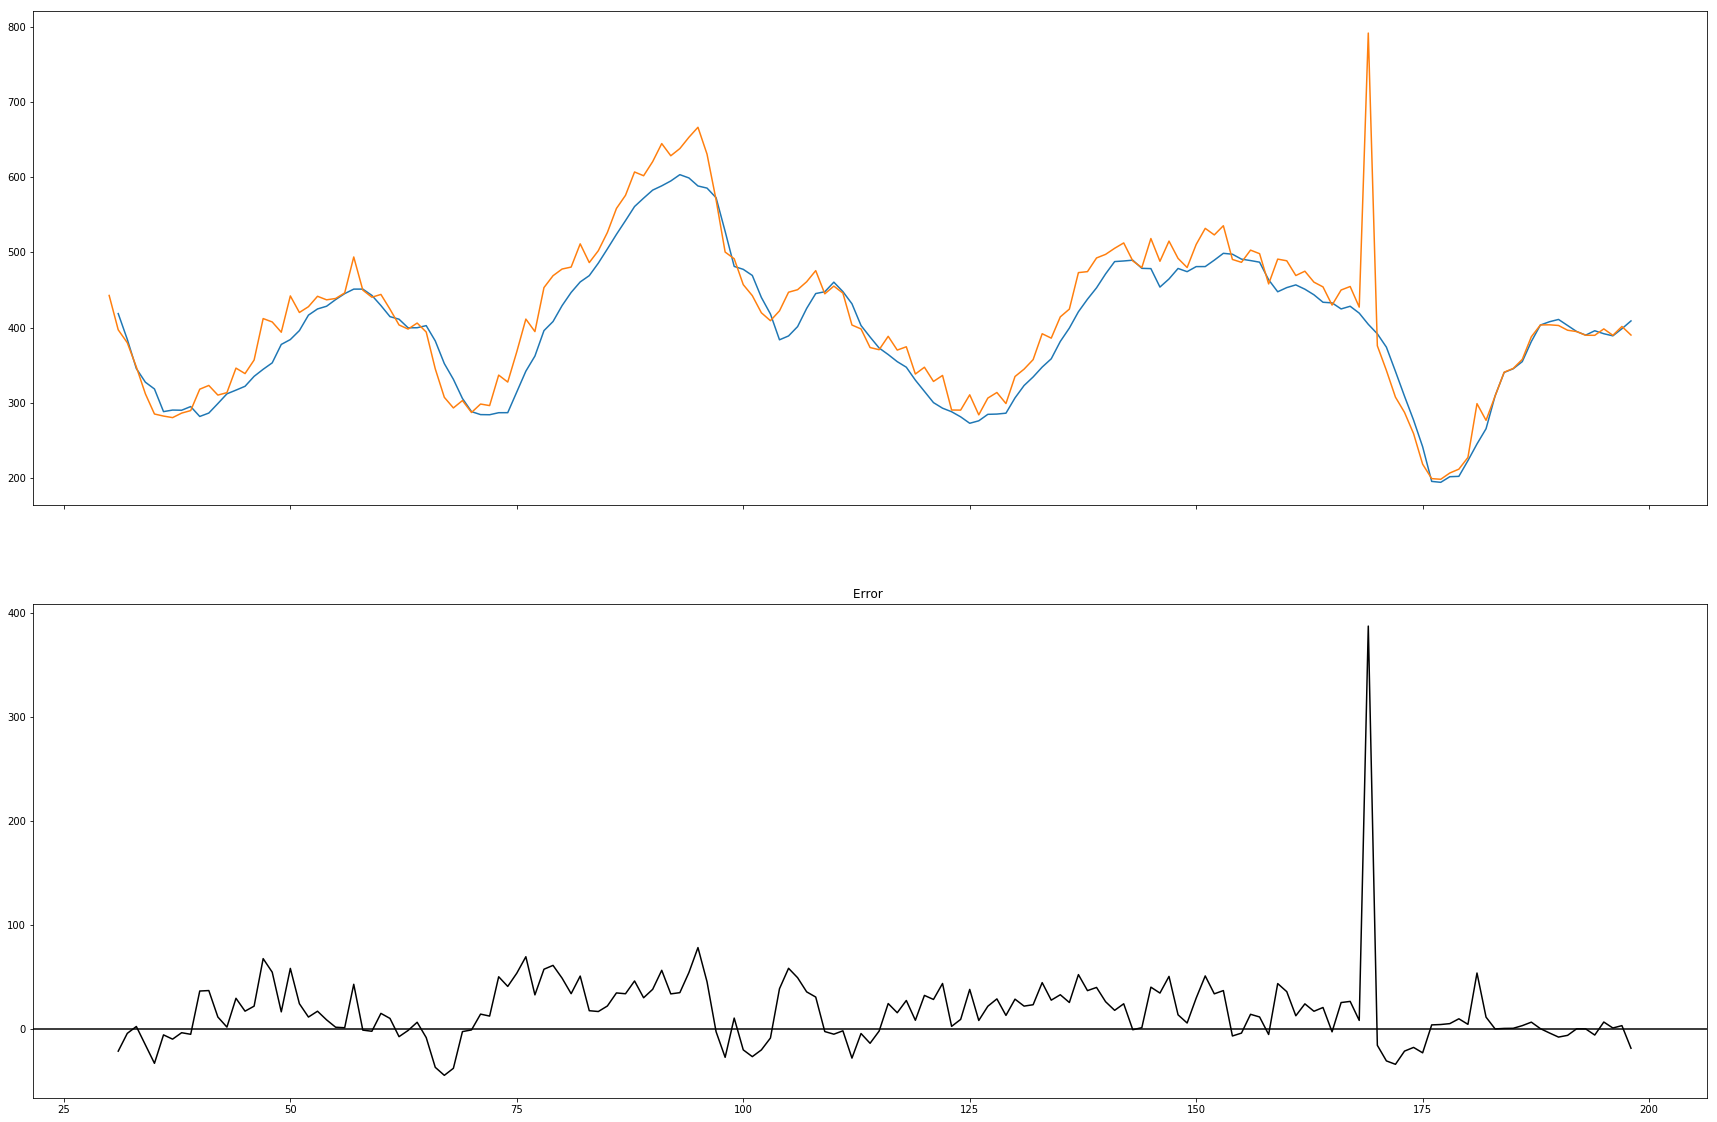

In [16]:


def create_dataset2(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
        return np.array(dataX)

#predicting the STD using predicted data point
predictionX,  predictionY   = create_dataset(dataset,29)
datatodate  = create_dataset2(dataset,30)
Prediction = create_dataset2(dataset, 29)

prediction = model.predict(predictionX)

value = np.hstack((Prediction,prediction))


f, axarr = plt.subplots(2,sharex=True,squeeze=False,figsize=(30,20))

axarr = axarr.flatten()

####
Rstd  = np.empty(len(dataset))
Rstd  [:] = np.nan
Rstd [look_back+2:] = np.std(datatodate, axis=1)

axarr[0].plot(Rstd,label = "real STD")
#

std  = np.empty(len(dataset))
std  [:] = np.nan
std [look_back+1:]= np.std(value,axis = 1,)
axarr[0].plot(std, label = 'STD prediction')


error = std - Rstd
axarr[1].plot(error, '-k')
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()


In [17]:
plt.show()

# Predicting the STD directly

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import metrics
import plotly.plotly as py
import plotly.tools as tls


look_back = 29
epoch = 200

np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[0], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train= dataset[0:train_size,:]
print(len(train))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                newstd = np.std(np.append(a,dataset[i+look_back+1]))
                a = a -mean
                dataX.append(a)
                dataY.append(newstd)
        return np.array(dataX), np.array(dataY)
##



###


trainX, trainY = create_dataset(train, look_back)


def mean(dataset):
        return np.mean(datas)
model = Sequential()
model.add(Dense(20,input_dim=look_back, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1,activation='linear'))



model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epoch, batch_size=2, verbose=2)



trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))




model.save('C:\\Users\\tcheng\\Documents\HSI1.h5')

196
Epoch 1/200
0s - loss: 43380.4462
Epoch 2/200
0s - loss: 12480.7407
Epoch 3/200
0s - loss: 6593.5743
Epoch 4/200
0s - loss: 4929.7493
Epoch 5/200
0s - loss: 4041.1522
Epoch 6/200
0s - loss: 3252.5970
Epoch 7/200
0s - loss: 2546.7526
Epoch 8/200
0s - loss: 2367.5885
Epoch 9/200
0s - loss: 2045.1659
Epoch 10/200
0s - loss: 1770.4650
Epoch 11/200
0s - loss: 1589.4197
Epoch 12/200
0s - loss: 1363.6913
Epoch 13/200
0s - loss: 1115.8994
Epoch 14/200
0s - loss: 1101.4083
Epoch 15/200
0s - loss: 856.0106
Epoch 16/200
0s - loss: 984.7233
Epoch 17/200
0s - loss: 720.6327
Epoch 18/200
0s - loss: 640.5681
Epoch 19/200
0s - loss: 542.7811
Epoch 20/200
0s - loss: 511.2472
Epoch 21/200
0s - loss: 465.3974
Epoch 22/200
0s - loss: 420.7998
Epoch 23/200
0s - loss: 342.9947
Epoch 24/200
0s - loss: 338.0647
Epoch 25/200
0s - loss: 308.3940
Epoch 26/200
0s - loss: 338.4956
Epoch 27/200
0s - loss: 301.1981
Epoch 28/200
0s - loss: 229.5800
Epoch 29/200
0s - loss: 237.0250
Epoch 30/200
0s - loss: 216.1601

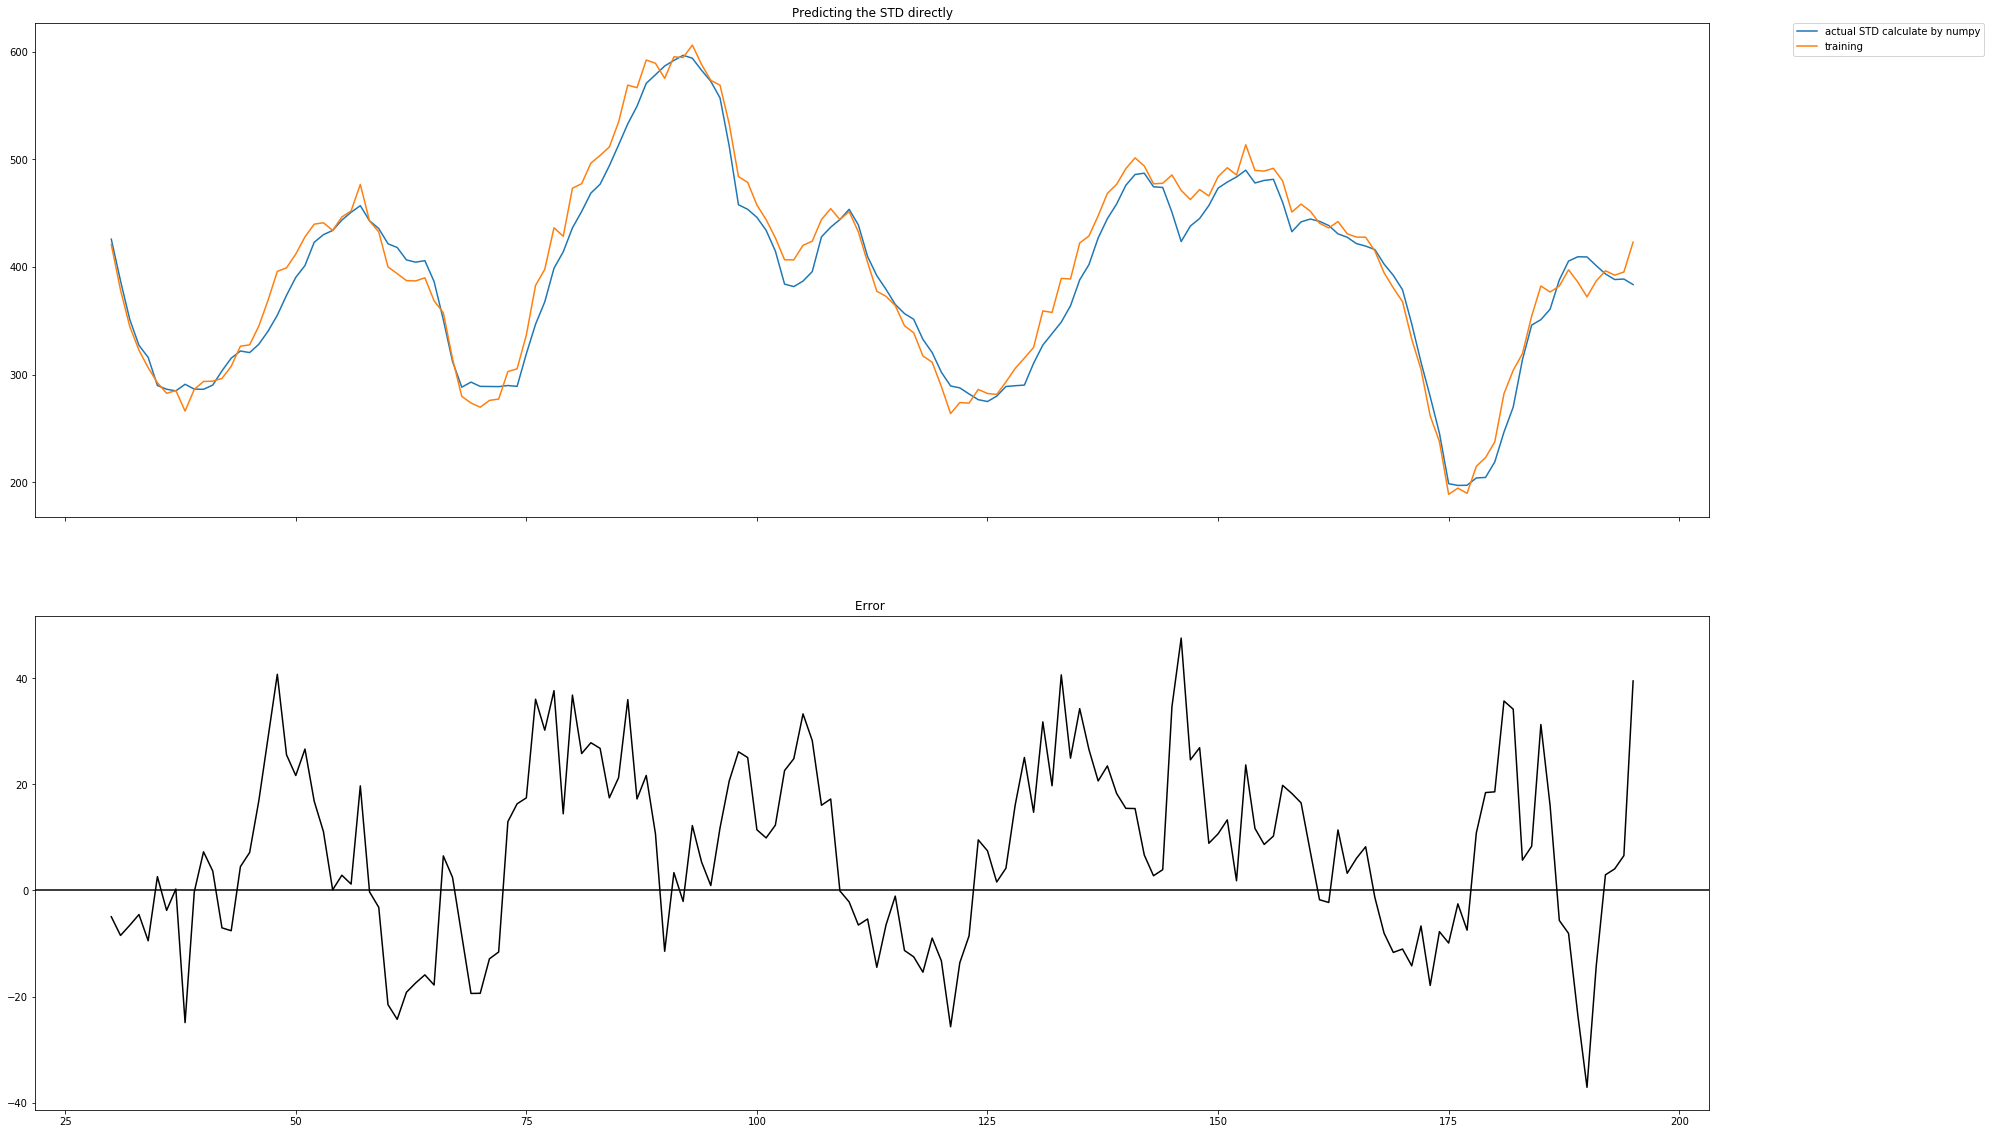

In [19]:
f, axarr = plt.subplots(2,sharex=True,squeeze=False,figsize = (30,20))

axarr = axarr.flatten()
def create_dataset2(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]



                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)



###
predictionX , PredictionY = create_dataset2(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
Rstd  = np.empty(len(dataset))
Rstd  [:] = np.nan
Rstd [look_back+1:]= np.std(prestack1, axis=1)


axarr[0].plot(Rstd, label = 'actual STD calculate by numpy')

trainPredict = model.predict(trainX)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+1:len(trainPredict)+look_back+1, :] = trainPredict


#axarr[0].plot(dataset,label = "dataset")

axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].set_title("Predicting the STD directly")
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



error = trainPredictPlot.flatten() - Rstd
axarr[1].plot(error, '-k')
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()


In [20]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import pandas
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np

look_back = 29
np.random.seed(10)
# frame a sequence as a supervised learning problem


dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[0], engine='python')
datasets = dataframe.values
dataset = datasets.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(dataset)


def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                # newstd = np.std(np.append(a,dataset[i+look_back+1]))
                a = a -mean
                dataX.append(a)
                dataY.append(dataset[i+look_back+1])
        return np.array(dataX), np.array(dataY)
# split into train and test sets
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]#, dataset[train_size-look_back-1:len(dataset),:]
#print(len(train), len(test))


############


trainX, trainY = create_dataset(train,look_back)
#testX, testY = create_dataset(test,look_back)
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))

#print(trainX)
batch_size  = 1
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = trainX, trainY
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(1, X.shape[1], X.shape[2]), return_sequences =True ,stateful = True))
    model.add(Dropout (0.2))
    model.add(LSTM(neurons, batch_input_shape=(1, X.shape[1], X.shape[2]), return_sequences =False,stateful = True))
    model.add(Dense(output_dim=1))
    model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
    for i in range(nb_epoch):
        print('Generation %d' % (i))
        model.fit(X, y, epochs=1, batch_size=1, verbose=2, shuffle=False)
        model.reset_states()
    return model

lstm_model = fit_lstm(trainX, 1,500 , 29)
trainPredict = lstm_model.predict(trainX, batch_size = batch_size)
lstm_model.reset_states()
#testPredict = lstm_model.predict(testX, batch_size = batch_size)
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+1:] = scaler.inverse_transform(trainPredict)
#testPredictPlot = np.empty_like(dataset)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+look_back:len(dataset)-1, :] = scaler.inverse_transform(testPredict)



#plt.plot(datasets , label = "dataset")
#plt.plot(trainPredictPlot , label = "trainPredict")



C:\Users\tcheng\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:64: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(units=1)`



Generation 0
Epoch 1/1
3s - loss: 42.1789
Generation 1
Epoch 1/1
0s - loss: 28.4031
Generation 2
Epoch 1/1
0s - loss: 34.0301
Generation 3
Epoch 1/1
0s - loss: 38.6108
Generation 4
Epoch 1/1
0s - loss: 44.3485
Generation 5
Epoch 1/1
0s - loss: 55.9839
Generation 6
Epoch 1/1
0s - loss: 44.0047
Generation 7
Epoch 1/1
0s - loss: 54.1931
Generation 8
Epoch 1/1
0s - loss: 50.8385
Generation 9
Epoch 1/1
0s - loss: 45.8404
Generation 10
Epoch 1/1
0s - loss: 46.2536
Generation 11
Epoch 1/1
0s - loss: 47.8179
Generation 12
Epoch 1/1
0s - loss: 43.4229
Generation 13
Epoch 1/1
0s - loss: 43.3324
Generation 14
Epoch 1/1
0s - loss: 42.3798
Generation 15
Epoch 1/1
0s - loss: 42.2385
Generation 16
Epoch 1/1
0s - loss: 36.5122
Generation 17
Epoch 1/1
0s - loss: 37.9465
Generation 18
Epoch 1/1
0s - loss: 35.0173
Generation 19
Epoch 1/1
0s - loss: 33.8028
Generation 20
Epoch 1/1
0s - loss: 38.1565
Generation 21
Epoch 1/1
0s - loss: 46.4163
Generation 22
Epoch 1/1
0s - loss: 37.7115
Generation 23
Epoch 1

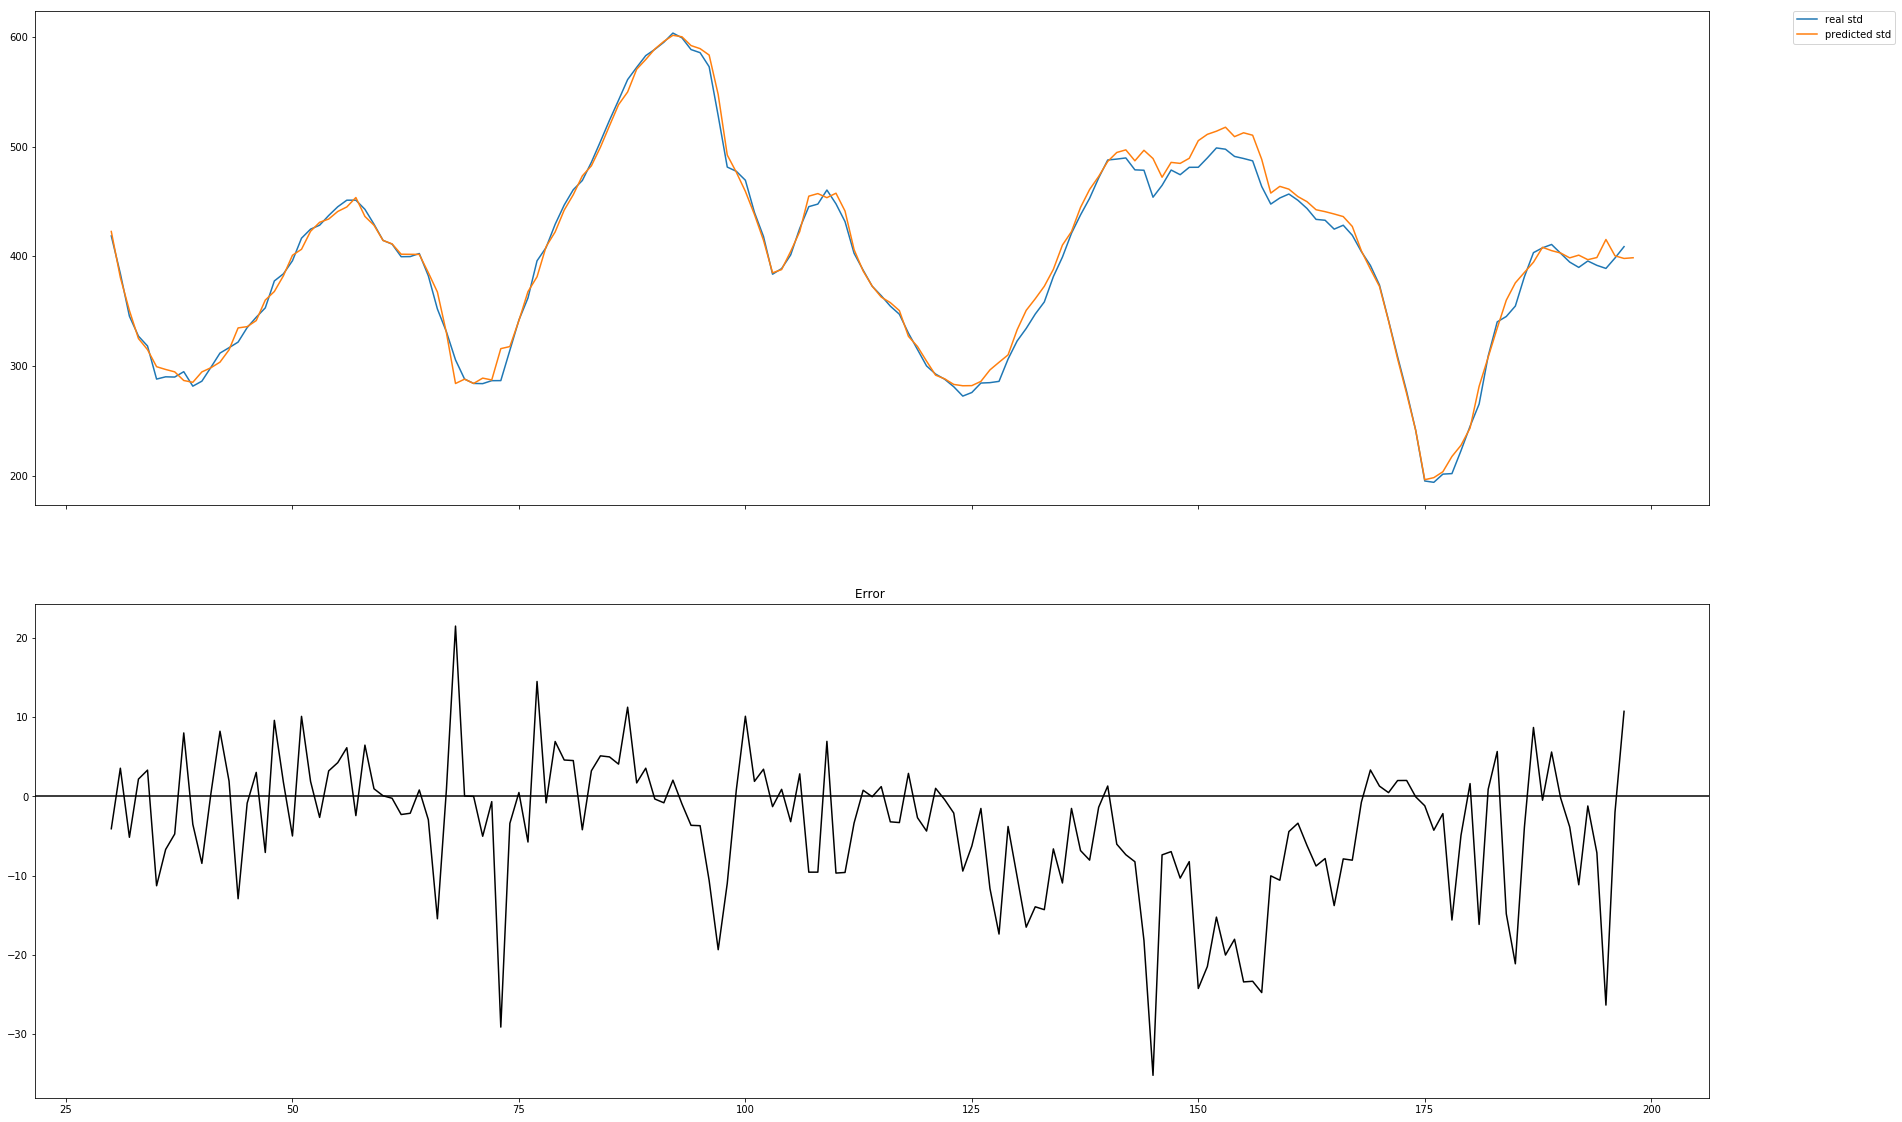

In [21]:

def moving_window(dataset, look_back=1):
        dataX = []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]

                dataX.append(a)
        return np.array(dataX)



Rstd = moving_window(datasets, look_back+1)
std =  moving_window(datasets, look_back)

np.delete(std,look_back-1,axis =1)

std = np.hstack((std,scaler.inverse_transform(trainPredict)))



f, axarr = plt.subplots(2,sharex=True,squeeze=False, figsize = (30,20))

axarr = axarr.flatten()
RRstd = np.empty(len(dataset))
RRstd[:] = np.nan
RRstd[look_back+1:-1] = np.std(Rstd, axis = 1 )


Std = np.empty(len(dataset))
Std[:] = np.nan
Std[look_back+1:] = np.std(std , axis = 1)


axarr[0].plot(RRstd, label= "real std")
axarr[0].plot(Std, label = 'predicted std')

#plt.plot(testPredictPlot , label = "testPredict")

axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


error = np.subtract(RRstd, Std)
axarr[1].plot(error, '-k')
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')